# Ниже приведено решение практической задачи 5.11 из раздела МНК. Часть решения содержится в тетради.

## Как было показано в тетради, решение задачи об аппроксимации функции 1/х можно свести к решению систему уравнений Ax=f. Давайте решим ее.

In [119]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import scipy as sp

In [27]:
A = np.array([[14.0/3,3.0], [3.0, 2.0]])
f = np.array([[2.0], [2.0*np.log(2.0)]])

x = np.linalg.solve(A,f)

a = x[0][0]
b = x[1][0]

print ("Решение данной системы:")
print 'a = {}, b = {}'.format(a,b)

Решение данной системы:
a = -0.476649250079, b = 1.40812105568


## Теперь построим график исходной функции и аппроксимации на [1,2]

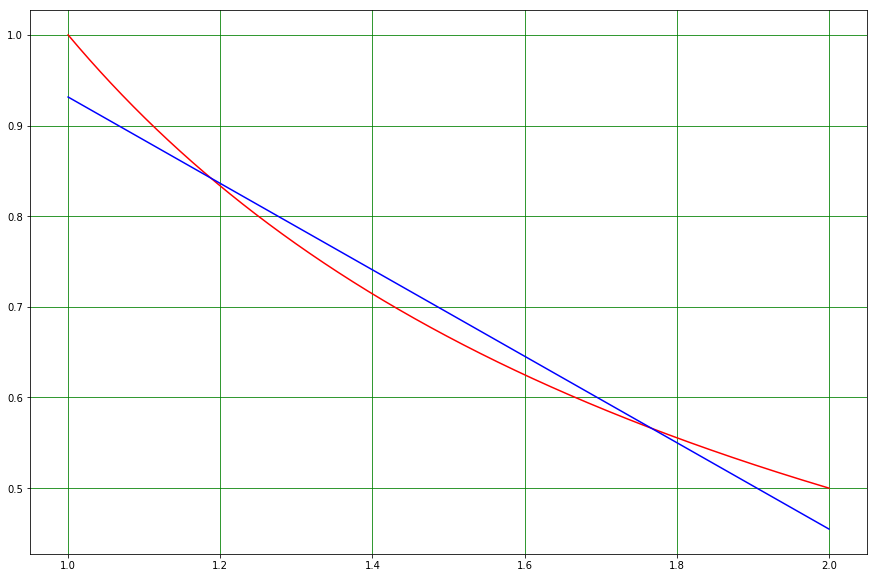

In [68]:
x_range = np.linspace(1,2,1000)
y_range = f(x_range)

x_range_approx = np.linspace(1,2,1000)
y_range_approx = f_approx(x_range_approx)

plt.figure(figsize=(15,10))
plt.grid(color='green')
plt.plot(x_range, y_range, color='red')
plt.plot(x_range_approx, y_range_approx, color='blue')

In [29]:
def f(x):
    return 1.0/x

In [35]:
def f_approx(x):
    return a*x + b

# Видно, что функция аппроксимирована неплохо в смысле МНК. Но давайте решим более интересную задачу:




Пусть нам заданы таблично значения функции
$$ x = {x_1, x_2, x_3, ... , x_n} $$
$$ y = {y_1, y_2, y_3, ... , y_n} $$

Будем ее аппроксимировать следущей функцией:
$$ y_i = a + \frac{b}{x_i} $$

Построим следующий функционал:
$$ F(a,b) = \sum_{i=1}^n (y_i - (a + \frac{b}{x_i}))^2 \rightarrow min$$
Коэффициенты a и b найдем из условия:
$$ \begin{cases}
\frac{\partial F(a,b)}{\partial a} = 0
\\
\frac{\partial F(a,b)}{\partial b} = 0
\end{cases}
$$

Решение этой системы легко ищется:
$$ 
a = \frac{\sum_{i=1}^n y_i * \sum_{i=1}^n (\frac{1}{x_i})^2 - \sum_{i=1}^n \frac{1}{x_i} * \sum_{i=1}^n \frac{y_i}{x_i}}{n\sum_{i=1}^n (\frac{1}{x_i})^2 - (\sum_{i=1}^n \frac{1}{x_i})^2}
$$

$$ 
b = \frac{n\sum_{i=1}^n \frac{y_i}{x_i} - \sum_{i=1}^n \frac{1}{x_i} * \sum_{i=1}^n y_i}{n\sum_{i=1}^n (\frac{1}{x_i})^2 - (\sum_{i=1}^n \frac{1}{x_i})^2}
$$

Средняя ошибка аппроксимации (в %) может быть вычислена следующим образом:
$$
\Delta = \frac{\sum_{i=1}^n |y_i - a - \frac{b}{x_i}|}{n\sum_{i=1}^n y_i} * 100\%
$$

In [126]:
def mnk(x,y):
    n=len(x)

    #  Некоторые нужные для подсчетов суммы
    s=sum(y)
    s1=sum([1/x[i] for i in  range(0,n)])
    s2=sum([(1/x[i])**2 for i in  range(0,n)])
    s3=sum([y[i]/x[i]  for i in range(0,n)])
    
    #Посчитанные коэффициенты
    a= round((s*s2-s1*s3)/(n*s2-s1**2),2) 
    b=round((n*s3-s1*s)/(n*s2-s1**2),2)
    
    # список значений гиперболической функции 
    s4=[a+b/x[i] for i in range(0,n)]
    
    # средняя ошибка аппроксимации
    so=round(sum([abs(y[i] -s4[i]) for i in range(0,n)])/(n*sum(y))*100,3)   
    
    x_approx = np.linspace(np.min(x), np.max(x), 1000)
    y_approx = a + b/x_approx
    plt.figure(figsize=(15,10))
    plt.title(u'Аппроксимация гиперболой Y='+str(a)+'+'+str(b)+u'/x\n Средняя ошибка--'+str(so)+u'%',size=14)
    plt.xlabel(u'Координата X', size=14)
    plt.ylabel(u'Координата Y', size=14)
    plt.plot(x, y, color='red', linestyle=' ', marker='o', label='Data(x,y)')
    plt.plot(x_approx, y_approx, color='blue', linewidth=2, label='Data(x,f(x)=a+b/x')
    plt.legend(loc='best')
    plt.grid(True, color='green')
    plt.show()

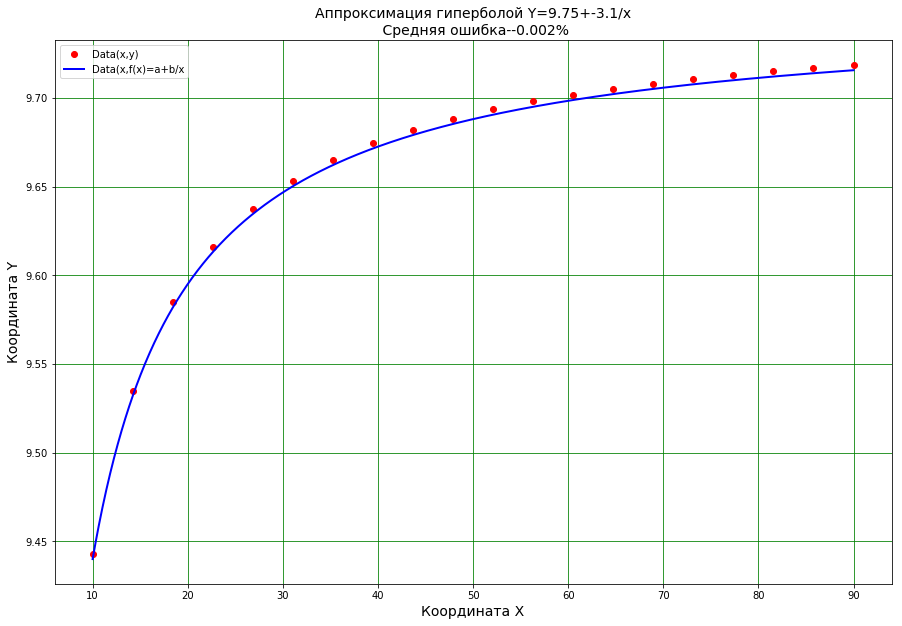

In [127]:
x=np.linspace(10,90,20)
y= -3.1 / x + 9.753
mnk(x,y)

# А теперь давайте добавим немного шумов в исходную таблицу, дадим небольшую погрешность в исходные данные и посмотрим, как это отразится на аппроксимации.

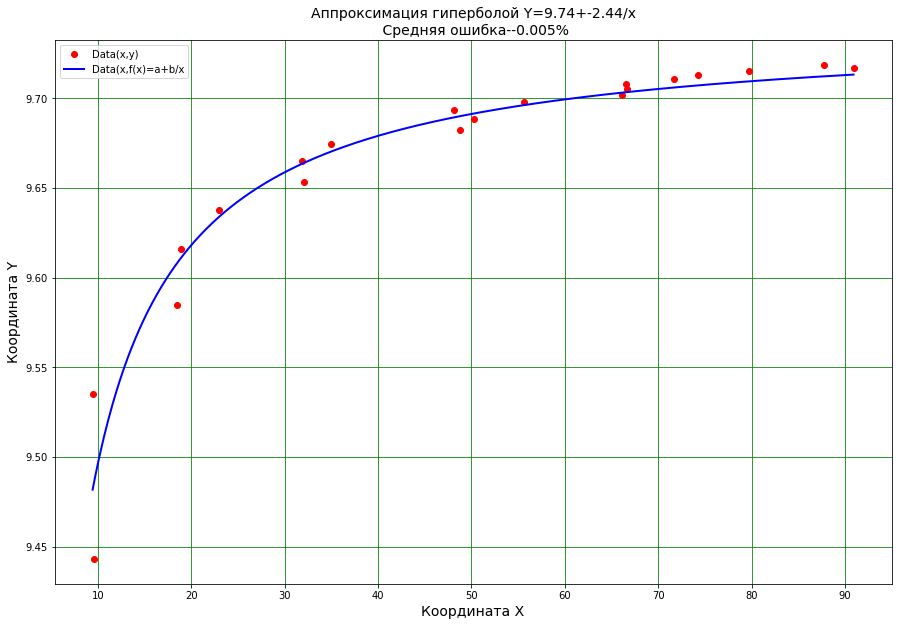

In [133]:
max_erf = 6.0
for i in range(len(x)):
    x[i] += np.random.rand()*2*max_erf - max_erf
mnk(x,y)

# Аппроксимация по прежнему работает успешно. А теперь давайте аппроксимируем эту же функцию многочленом положительных степеней.

In [158]:
def mnk_polyn(x,y, d):
    fp, residuals, rank, sv, rcond = sp.polyfit(x, y, d, full=True)
    f = sp.poly1d(fp)
    
    print 'Коэффициенты при степенях многочлена:'
    print fp
    
    # список значений функции 
    y1=[fp[0]*x[i]**2+fp[1]*x[i]+fp[2] for i in range(0,len(x))]
    
    # средняя ошибка аппроксимации
    so=round(sum([abs(y[i]-y1[i]) for i in range(0,len(x))])/(len(x)*sum(y))*100,4)
    #print(u'Cредняя ошибка: '+str(so)) 
    fx = sp.linspace(x[0], x[-1] + 1, len(x))
    
    plt.figure(figsize=(15,10))
    plt.plot(x, y, 'o', label='Original data', markersize=10, color = 'red')
    plt.plot(fx, f(fx), linewidth=2, color='blue')
    plt.grid(True, color='green')
    plt.show()

# Аппроксимируем многочленом 2й степени

Коэффициенты при степенях многочлена:
[-6.15979053e-05  8.53688072e-03  9.42643643e+00]


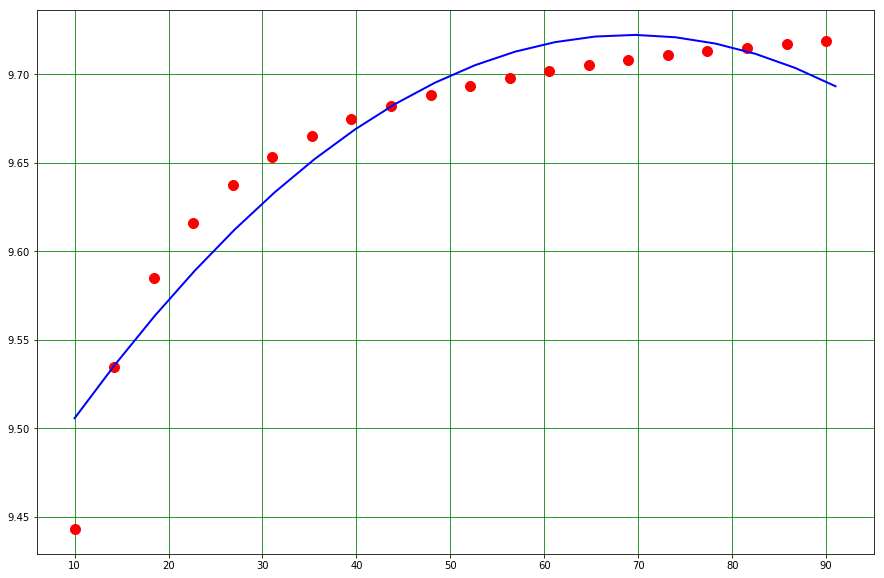

In [159]:
x=np.linspace(10,90,20)
y= -3.1 / x + 9.753

mnk_polyn(x,y,2)

# Аппроксимируем многочленом 5й степени

Коэффициенты при степенях многочлена:
[ 9.99141715e-10 -2.89715262e-07  3.26079482e-05 -1.79596877e-03
  5.01001274e-02  9.09620753e+00]


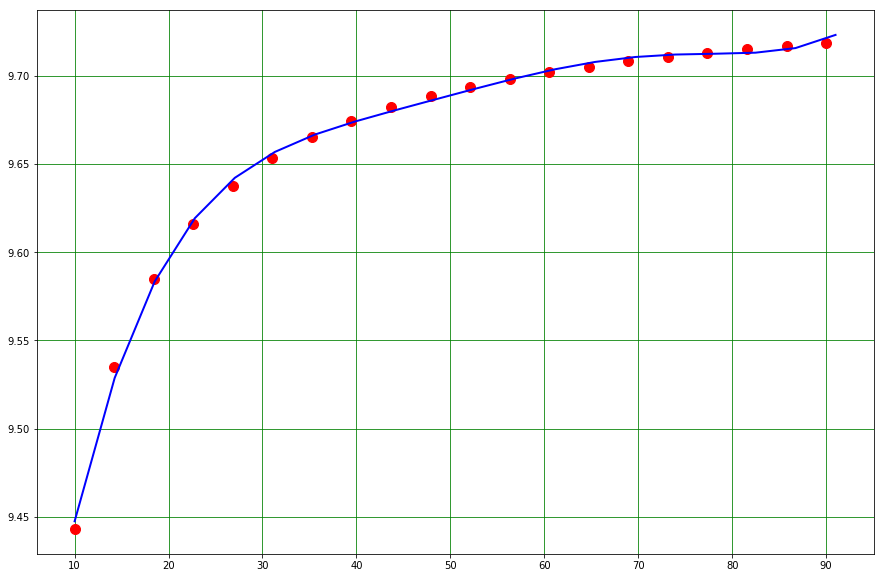

In [168]:
x=np.linspace(10,90,20)
y= -3.1 / x + 9.753

mnk_polyn(x,y,5)

# Видно, что функция хорошо аппроксимируется. Но теперь можно попробовать увеличить степень многочлена еще сильнее, т.к. есть подозрение, что наша модель в таком случае может переобучиться.

Коэффициенты при степенях многочлена:
[ 3.22085773e-74 -4.56641694e-72 -2.04544630e-70  1.40837476e-68
  2.63161283e-66  1.72107135e-64 -2.42506831e-64 -1.35513262e-60
 -1.65175310e-58 -9.96881908e-57  6.72124208e-56  9.05945055e-53
  1.11475130e-50  6.79316455e-49 -6.93299221e-48 -6.65095829e-45
 -7.73926632e-43 -3.80482102e-41  2.11382852e-39  5.78178935e-37
  4.69501293e-35  1.97572786e-35 -4.12332584e-31 -4.01558696e-29
  7.49713148e-29  3.65886893e-25  2.53556176e-23 -1.80883302e-21
 -3.13137295e-19  7.58723653e-18  2.95580022e-15 -1.17453992e-13
 -2.22985306e-11  2.98702850e-09 -1.83049040e-07  7.01608923e-06
 -1.82202960e-04  3.27098034e-03 -4.00760428e-02  3.19829828e-01
  8.25724241e+00]


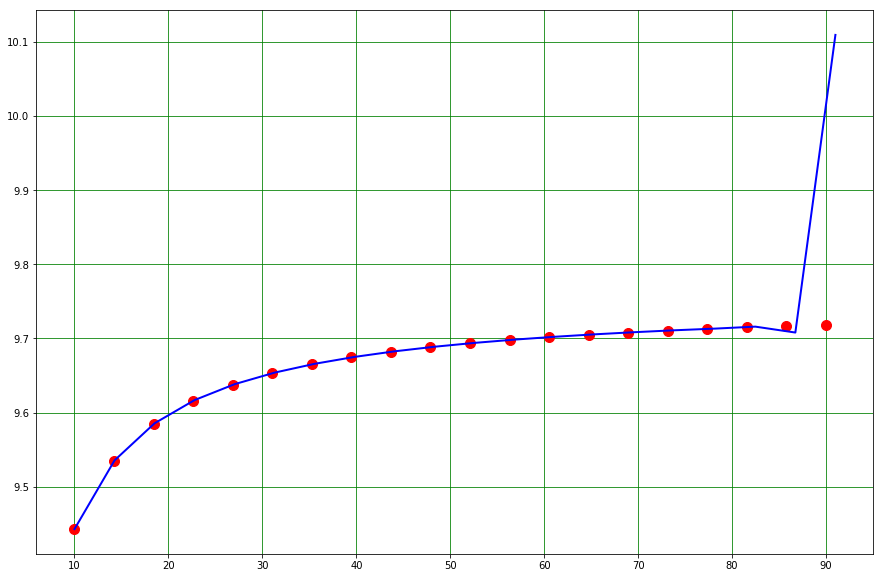

In [170]:
x=np.linspace(10,90,20)
y= -3.1 / x + 9.753

mnk_polyn(x,y,40)

# Это и произошло, наша модель будет ужасно работать при слегка изменившемся диапазоне значений, то есть для значений не входящих в рассматриваемый промежуток этот многочлен будет давать сильно плохие значения, но зато на рассматриваемом интервале он хорошо приближает f=1/x. Это не страшно, т.к. перед нами не стояло задачи прогноза значений  вне области определения.

# Теперь аналогично прошлому эксперименту дадим нашим исходным табличным данным небольшое возмущение и посмотрим на результат. Предположение: на больших степенях многочлена будет видно переобучение, многочлен будет сильно подстраиваться под исходные данные и не будет отражать динамику изменения.

# Для многочлена 2й степени

Коэффициенты при степенях многочлена:
[-5.40276126e-05  7.81083662e-03  9.43971221e+00]


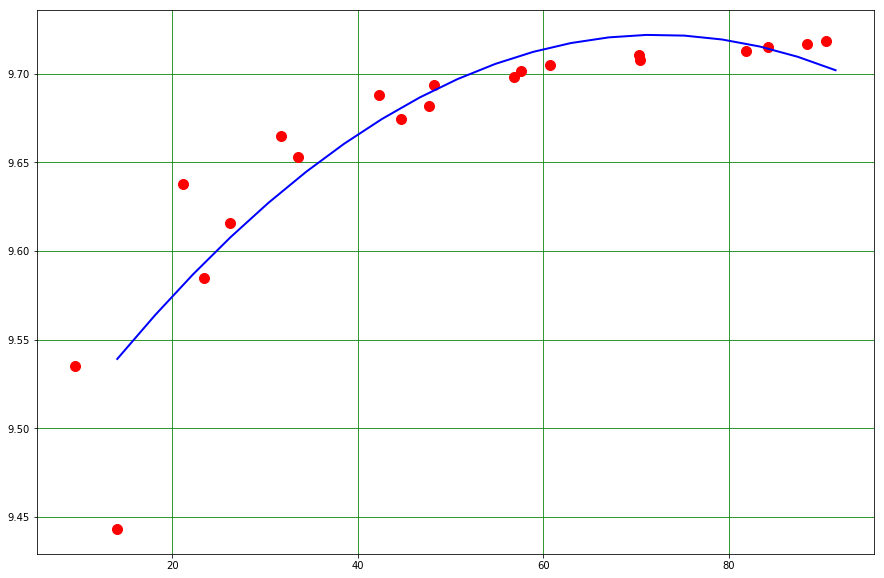

In [171]:
x=np.linspace(10,90,20)
y= -3.1 / x + 9.753

max_erf = 6.0
for i in range(len(x)):
    x[i] += np.random.rand()*2*max_erf - max_erf

mnk_polyn(x,y,2)

# Для многочлена 5й степени

Коэффициенты при степенях многочлена:
[ 3.07296711e-11 -2.58241335e-08  5.69230720e-06 -5.41173181e-04
  2.44817469e-02  9.26167061e+00]


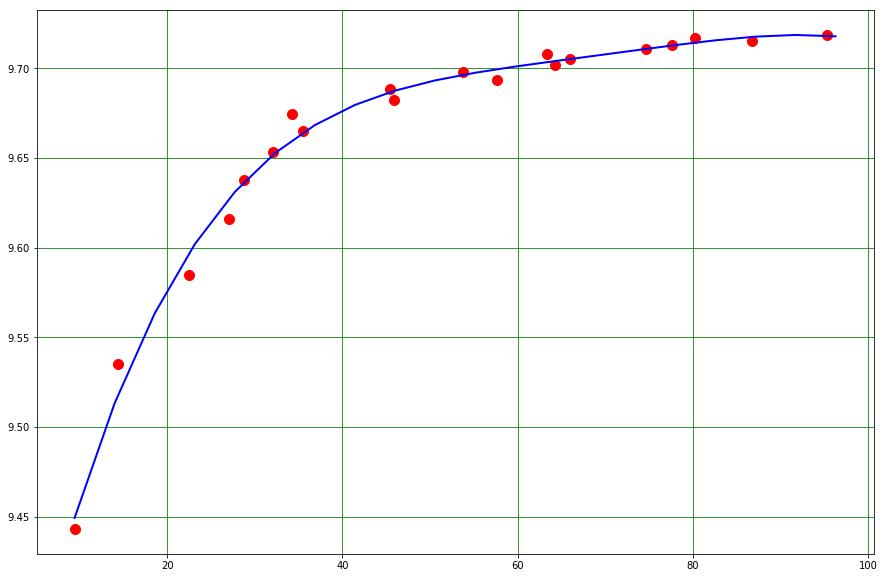

In [173]:
x=np.linspace(10,90,20)
y= -3.1 / x + 9.753

max_erf = 6.0
for i in range(len(x)):
    x[i] += np.random.rand()*2*max_erf - max_erf

mnk_polyn(x,y,5)

# Для многочлена 20й степени

Коэффициенты при степенях многочлена:
[-1.01392222e-30  6.14416681e-28 -1.52703878e-25  1.84686680e-23
 -7.34379147e-22 -7.64892850e-20  9.15968503e-18  1.17969003e-16
 -7.38183367e-14  3.35257401e-12  3.27768136e-10 -5.57815650e-08
  4.02693698e-06 -1.84593575e-04  5.87493946e-03 -1.33140680e-01
  2.14122113e+00 -2.38096751e+01  1.73211445e+02 -7.37093937e+02
  1.39073130e+03]


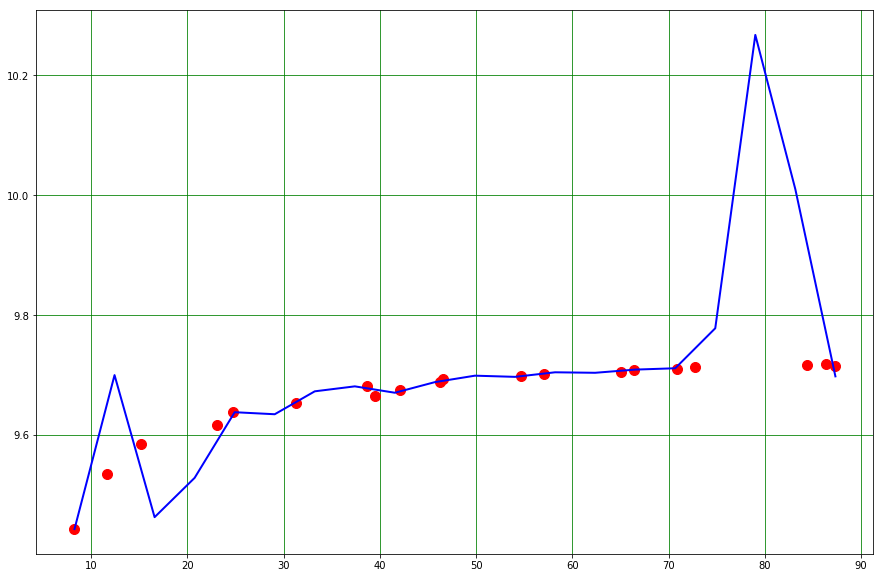

In [177]:
x=np.linspace(10,90,20)
y= -3.1 / x + 9.753

max_erf = 6.0
for i in range(len(x)):
    x[i] += np.random.rand()*2*max_erf - max_erf

mnk_polyn(x,y,20)

# Предположение оказалось верным. Алгоритм был настроен на минимизацию среднеквадратичной ошибки, но степень многочлена была подобрана неправильно, так что теперь он переобучился и не отражает общую динамику изменения функции.

## Для предотвращения переобучения можно было ввести веса и сделать L1 или L2 регуляризацию, а лучше применить их вместе.

# P.S. Немного ушел от темы МНК)